In [1]:
import sys  
!{sys.executable} -m pip install --user matplotlib
import pandas as pd
import numpy as np
%matplotlib inline

data = pd.read_csv("MyEBirdData.csv")

df = pd.DataFrame(data, columns = ['Submission ID', 'Common Name', 'Location', 'Date', 'Time', 'Count', 'All Obs Reported'
                                   #'Scientific Name', 'Count', 'State/Province', 'County', 'Duration (Min)'
                                 ])
#df['County'].fillna('n/a', inplace=True)
df['Count'].replace('X', '1',inplace=True)
df['Count'] = df['Count'].astype(int)
df['Date'] = pd.to_datetime(df['Date'])


In [2]:
locate = 'Grovelands Park'
lp = df.loc[(df['Location'] == 'Grovelands Park') & (df['Date'].dt.year == 2022) & (df['All Obs Reported'] == 1)].copy()

In [3]:
# Total species seen

species = lp.groupby(['Common Name']).size()#.to_frame('Size')
print('Total species:', species.count())


Total species: 66


Total checklists: 33


<Axes: title={'center': 'Species per Checklist.'}, xlabel='Date,Submission ID'>

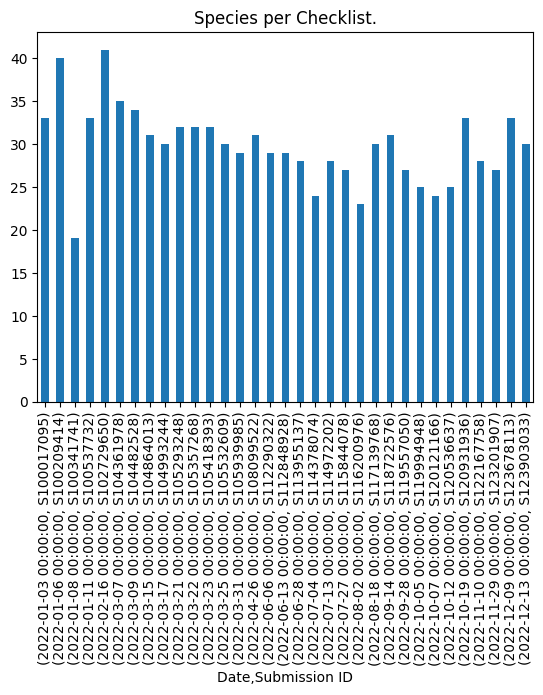

In [4]:

# Checklists with number of species recorded.

checklists = lp.groupby(['Date', 'Submission ID']).size().sort_index(ascending=True)
print('Total checklists:', checklists.count())
checklists.plot(kind='bar', title='Species per Checklist.')

,Occ.
Month,
1,45
2,41
3,49
4,31
6,34
7,36
8,32
9,35
10,40


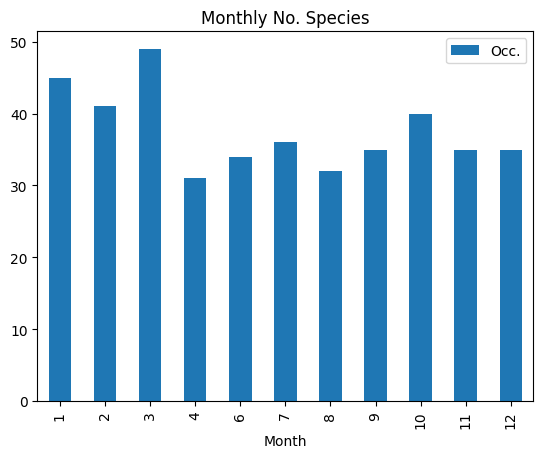

In [31]:
# Species by month.

# --Original working--
#regroup = lp.groupby(['Common Name', lp['Date'].dt.month]).first('12M').copy() #.value_counts() # groupby each 1 month
#ti = regroup.iloc[:, 0].index.copy()
#tix = ti.to_frame(index=False)
#tix = regroup.index.to_frame(index=False)
#tix.rename(columns={'Date': 'Month'}, inplace=True)
#x = tix.groupby(['Month']).size().to_frame('Species.')

regroup = lp.groupby(['Common Name', lp['Date'].dt.month]).first('12M') # First record of Common Name for each month.

monthly = regroup.index.to_frame(index=False) # Index contains 'Common Name', 'Date' as Month, so make it a frame.

monthly.rename(columns={'Date': 'Month'}, inplace=True)

xm = monthly.groupby(['Month']).size().to_frame('Occ.') # Monthly number of species.

xm.plot.bar(title='Monthly No. Species')
xm

,Abu.
Month,
1,294
2,297
3,221
4,143
6,177
7,199
8,163
9,211
10,279


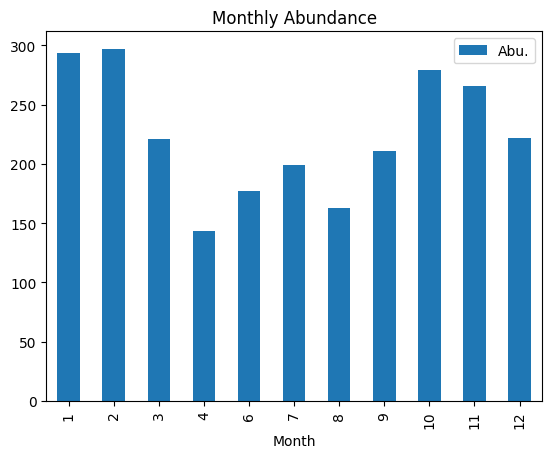

In [37]:
monthly['Count'] = regroup['Count'].reset_index(drop=True) # Add column of Count.

xa = monthly.groupby(['Month']).sum() # Monthly count of species.

xa = xa['Count'].copy().to_frame('Abu.') # Remove 'Common Name' column.

xa.plot.bar(title='Monthly Abundance')
xa

,Occ.,Abu.
Month,,
1,45,294
2,41,297
3,49,221
4,31,143
6,34,177
7,36,199
8,32,163
9,35,211
10,40,279


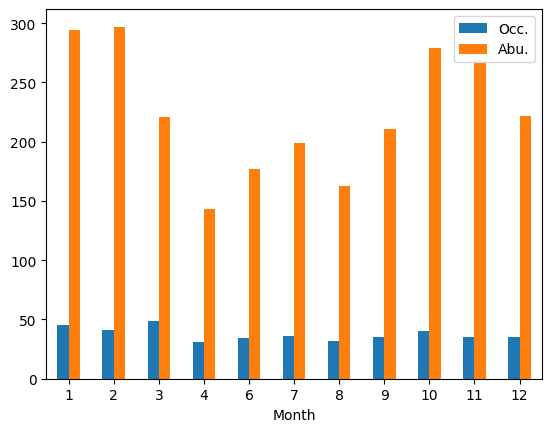

In [39]:
result = pd.concat([xm, xa], axis=1)
result.plot(kind='bar', logy=False, rot=0)

display(result)

In [8]:
# Species and occurrence on checklists
#lp['Common Name'].value_counts() <- this also works for Abun.

x = lp.groupby(['Common Name']).size().to_frame('Frequency.')

x['Abundance.'] = lp.groupby('Common Name')['Count'].sum()

x['Occurence.'] = x['Frequency.'] / len(lp.groupby('Submission ID').size())
x = x.round({'Occurence.': 3})

x = x.sort_values(by=['Occurence.', 'Abundance.'], ascending=False).head(50)
display(x)


,Frequency.,Abundance.,Occurence.
Common Name,,,
Eurasian Coot,33,820,1.000
Canada Goose,33,577,1.000
Feral Pigeon,33,479,1.000
Mallard,33,370,1.000
Common Moorhen,33,211,1.000
Common Magpie,33,151,1.000
Carrion Crow,33,129,1.000
European Robin,33,128,1.000
Common Woodpigeon,32,339,0.970


,Count
Date,
2022-01-03,265
2022-01-06,236
2022-01-08,142
2022-01-11,298
2022-02-16,297
2022-03-07,205
2022-03-09,164
2022-03-15,161
2022-03-17,185


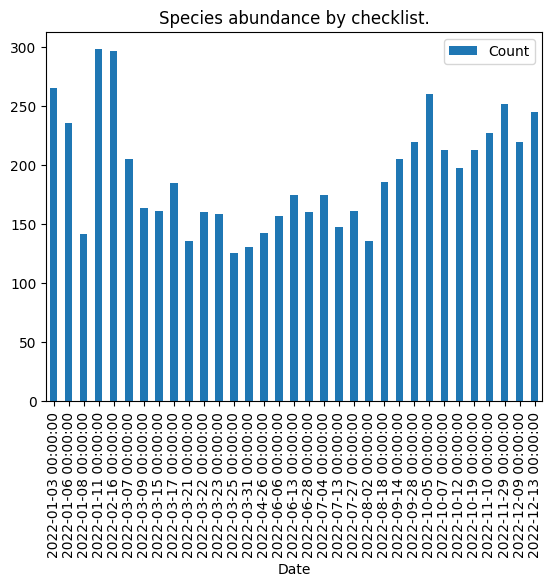

In [9]:
#%matplotlib inline

xc = pd.DataFrame(lp, columns = ['Date', 'Count'])

xc = xc.groupby('Date').sum()

xc.plot(kind='bar', title='Species abundance by checklist.')

xc

Date
1     125
2      41
3     285
4      31
6      86
7      79
8      53
9      58
10    107
11     55
12     63
dtype: int64

" # Also works as above.\nxcm = pd.DataFrame(lp, columns = ['Date'])\nxcm = xcm.groupby(lp['Date'].dt.month).count()\nxcm.plot(kind='bar')\n"

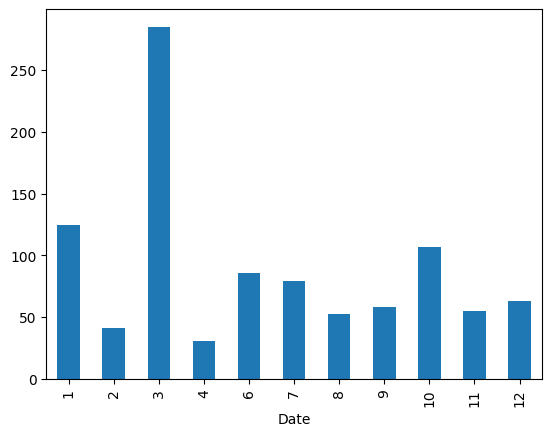

In [10]:
# Species records, cumulative number of sightings on checklists for each month, e.g., black-headed gull records each month added from all checklists.

xcm = lp.groupby(lp['Date'].dt.month).size().sort_index(ascending=True)#sort_values for sort by no. of species.
xcm.plot(kind='bar')
display(xcm)

''' # Also works as above.
xcm = pd.DataFrame(lp, columns = ['Date'])
xcm = xcm.groupby(lp['Date'].dt.month).count()
xcm.plot(kind='bar')
'''
